<a href="https://colab.research.google.com/github/nagae/ICL_B_2021/blob/main/aggregate_by_area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 圏域別に集計する
たとえば，東北地方で陽性数を集計する場合は，
```
tohoku = ["青森県", "秋田県", "岩手県", "山形県", "宮城県", "福島県"]
```
というように，複数の県のリストに `tohoku` という圏域名をつけておき
```
tohoku_conf = jp_df.loc[tohoku]["陽性数"].sum(level=1).sort_index()
```
とすればよい． 

「東北地方だけを集計したデータフレーム」を作ってもよい．
```
tohoku_df = jp_df.loc[tohoku].sum(level=1).sort_index()
tohoku_conf = tohoku_df["陽性数"]
```
とすれば，各列に東北地方の各県のデータの和を持つ `tohoku_df` というデータフレームが得られる("年", "月", "日" とか "実効再生産数"のように本来和を取るべきでないものまで総和になってしまうのは御愛嬌．

In [1]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import datetime
# ファイルを読み込み，列名を使いやすい形に修正
fname = 'https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv'
jp_df = pd.read_csv(fname, dtype=str)
jp_df.columns = [ "年", "月", "日", "都道府県", "Pref", "陽性数", "検査数", "入院数", "重症数","退院数", "死亡数","実効再生産数"]
# 都道府県名以外の全てのセルを整数値に変換する
for c in jp_df.columns:
    if c in ["都道府県", "Pref"]: # 都道府県名のデータは文字型として扱う
        jp_df[c] = jp_df[c].astype(str)
    else:
        jp_df[c] = pd.to_numeric(jp_df[c], errors='coerce') # 都道府県名以外のデータは数値として扱う
        jp_df[c] = jp_df[c].fillna(0) # データが欠損している部分を0で埋める
        jp_df[c] = jp_df[c].astype(float) # 一旦は実数型に変換する 
        if c not in ["実効再生産数"]: # 実効再生産数以外のデータは整数型として扱う
            jp_df[c] = jp_df[c].astype(int)
# 年月日の列からdatetime型のインデックスを生成する
jp_df["年月日"] = pd.to_datetime(jp_df[["年", "月", "日"]].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
# 都道府県名と年月日からなるマルチインデックスを構築
jp_df = jp_df.set_index(["都道府県", "年月日"])
jp_df # jp_df の概観を表示

,,年,月,日,Pref,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
都道府県,年月日,,,,,,,,,,,
東京都,2020-02-08,2020,2,8,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-08,2020,2,8,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-09,2020,2,9,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-09,2020,2,9,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-10,2020,2,10,Tokyo,3,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
熊本県,2021-05-12,2021,5,12,Kumamoto,4914,69306,691,18,4140,83,1.75
大分県,2021-05-12,2021,5,12,Oita,2590,123713,682,3,1878,30,1.30
宮崎県,2021-05-12,2021,5,12,Miyazaki,2697,35075,457,5,2207,25,3.78


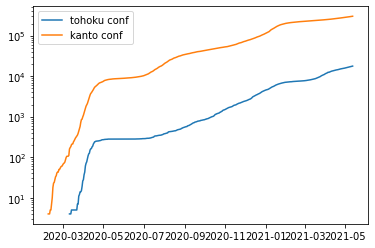

In [48]:
# 圏域を設定
tohoku = ["青森県", "秋田県", "岩手県", "山形県", "宮城県", "福島県"]
kanto = ["栃木県", "群馬県", "埼玉県", "茨城県", "千葉県", "東京都", "神奈川県"]
# 各圏域ごとに陽性数を集計
tohoku_conf = jp_df.loc[tohoku]["陽性数"].sum(level=1).sort_index()
kanto_conf = jp_df.loc[kanto]["陽性数"].sum(level=1).sort_index()
# プロット
date = tohoku.index
plt.plot(tohoku_conf, label="tohoku conf")
plt.plot(kanto_conf, label="kanto conf")
plt.yscale('log')
plt.legend()
plt.show()

In [43]:
tohoku_df

,年,月,日,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
年月日,,,,,,,,,,
2020-03-11,12120,18,66,4,401,0,0,0,0,0.00
2020-03-12,12120,18,72,4,483,0,0,0,0,0.00
2020-03-13,12120,18,78,4,512,0,0,0,0,0.00
2020-03-14,12120,18,84,5,512,0,0,0,0,0.00
2020-03-15,12120,18,90,5,512,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
2021-05-08,12126,30,48,17109,476533,1710,37,15076,303,6.99
2021-05-09,12126,30,54,17266,478981,1762,39,15176,306,6.50
2021-05-10,12126,30,60,17407,481921,1793,44,15296,310,6.26
